# Part A - Descriptive Statistics

I will begin with the general first steps for the descriptive analysis. Hence, importing the datasets, import the first relevant libraries, and making myself familiar with the different variables and structures of the datasets.

In [288]:
import pandas as pd
import numpy as np

In [289]:
# Read the data

whr_2015 = pd.read_csv('World_Happiness_Report_2015.csv')
whr_2016 = pd.read_csv('World_Happiness_Report_2016.csv')
whr_2017 = pd.read_csv('World_Happiness_Report_2017.csv')
whr_2018 = pd.read_csv('World_Happiness_Report_2018.csv')
whr_2019 = pd.read_csv('World_Happiness_Report_2019.csv')

In [290]:
# Printing the amount of variables within the datasets and check for missing values

print(whr_2015.shape[1])
print(whr_2016.shape[1])
print(whr_2017.shape[1])
print(whr_2018.shape[1])
print(whr_2019.shape[1])

missing_values15 = whr_2015.isnull().sum()
missing_values16 = whr_2016.isnull().sum()
missing_values17 = whr_2017.isnull().sum()
missing_values18 = whr_2018.isnull().sum()
missing_values19 = whr_2019.isnull().sum()

print(missing_values15)
print(missing_values16)
print(missing_values17)
print(missing_values18)
print(missing_values19)

12
13
12
9
9
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
Country                          0
Happiness.Rank                   0
Happiness.Score 

There is one missing value. There is no value for the perception of corruption for the United Arab Emirates. I will delete this row to be able to continue my analysis. 

In [292]:
# Find row of the missing value

missing_indices = whr_2018[whr_2018.isnull().any(axis=1)].index
print(missing_indices) 

Index([], dtype='int64')


In [293]:
# Delete Row of missing value and create the new CSV without the row with the missing value
whr_2018 = whr_2018.dropna()
whr_2018.to_csv('World_Happiness_Report_2018.csv', index=False)

### Task 1. Identify and describe the types of variables present in the World Happiness Report dataset. Categorize each variable as discrete, categorical, ordinal, or continuous.

First step is to make myself familiar with the different column and variables within the datasets. Afterwards, I will look into the datasets and categorize them. 

In [296]:
variables_list15 = whr_2015.columns.tolist()
print(variables_list15)
print(whr_2015.head())

['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  

In [297]:
variables_list16 = whr_2016.columns.tolist()
print(variables_list16)
print(whr_2016.head())

['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351            

In [298]:
variables_list17 = whr_2017.columns.tolist()
print(variables_list17)
print(whr_2017.head())

['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']
       Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163  

In [299]:
variables_list18 = whr_2018.columns.tolist()
print(variables_list18)
print(whr_2018.head())

['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353  

In [300]:
variables_list19 = whr_2019.columns.tolist()
print(variables_list19)
print(whr_2019.head())

['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354  

**Solution for Task1. 
Categorization of Variables 2015 Report**

1. Country: Categorial
2. Region: Categorial
3. Happiness Rank: Ordinal
4. Happiness Score: Continous
5. Standard Error: Continous
6. Economy (GDP per Capita): Continous
7. Family: Continous
8. Health (Life Expectancy): Continous
9. Freedom: Continous
10. Trust (Government Corruption): Continous
11. Generosity: Continous
12. Dystopia Residual: Continous

**Categorization of Variables 2016 Report**

1. Country: Categorial
2. Region: Categorial
3. Happiness Rank: Ordinal
4. Happiness Score: Continous
5. Lower Confidence Intervall: Continous
6. Upper Confidence Intervall: Continous
7. Economy (GDP per Capita): Continous
8. Family: Continous
9. Health (Life Expectancy): Continous
10. Freedom: Continous
11. Trust (Government Corruption): Continous
12. Generosity: Continous
13. Dystopia Residual: Continous

**Categorization of Variables 2017 Report**
1. Country: Categorial
2. Happiness Rank: Ordinal
3. Happiness Score: Continous
4. Whisker High: Continous
5. Whisker Low: Continous
6. Economy (GDP per Capita): Continous
7. Family: Continous
8. Health (Life Expectancy): Continous
9. Freedom: Continous
10. Generosity: Continous
11. Trust (Government Corruption): Continous
12. Dystopia Residual: Continous

**Categorization of Variables 2018 Report**

1. Overall rank: Ordinal
2. Country or region: Categorial
3. Score: Continous
4. GDP per capita: Continous
5. Social support: Continous
6. Healthy life expectancy: Continous
7. Freedom to make life choices: Continous
8. Generosity: Continous
9. Perceptions of corruption: Continous

**Categorization of Variables 2019 Report**

1. Overall rank: Ordinal
2. Country or region: Categorial
3. Score: Continous
4. GDP per capita: Continous
5. Social support: Continous
6. Healthy life expectancy: Continous
7. Freedom to make life choices: Continous
8. Generosity: Continous
9. Perceptions of corruption: Continous

### Task 2. Mean, median, variance, and standard deviation for each continuous variable for each dataset.

In [303]:
# World Health Report 2015

hs_stats_2015 = whr_2015['Happiness Score'].agg(['mean', 'median', 'var', 'std'])
se_stats_2015 = whr_2015['Standard Error'].agg(['mean', 'median', 'var', 'std'])
ec_stats_2015 = whr_2015['Economy (GDP per Capita)'].agg(['mean', 'median', 'var', 'std'])
fa_stats_2015 = whr_2015['Family'].agg(['mean', 'median', 'var', 'std'])
he_stats_2015 = whr_2015['Health (Life Expectancy)'].agg(['mean', 'median', 'var', 'std'])
fr_stats_2015 = whr_2015['Freedom'].agg(['mean', 'median', 'var', 'std'])
tr_stats_2015 = whr_2015['Trust (Government Corruption)'].agg(['mean', 'median', 'var', 'std'])
ge_stats_2015 = whr_2015['Generosity'].agg(['mean', 'median', 'var', 'std'])
dr_stats_2015 = whr_2015['Dystopia Residual'].agg(['mean', 'median', 'var', 'std'])

print(hs_stats_2015)
print(se_stats_2015)
print(ec_stats_2015)
print(fa_stats_2015)
print(he_stats_2015)
print(fr_stats_2015)
print(tr_stats_2015)
print(ge_stats_2015)
print(dr_stats_2015)


mean      5.375734
median    5.232500
var       1.311048
std       1.145010
Name: Happiness Score, dtype: float64
mean      0.047885
median    0.043940
var       0.000294
std       0.017146
Name: Standard Error, dtype: float64
mean      0.846137
median    0.910245
var       0.162506
std       0.403121
Name: Economy (GDP per Capita), dtype: float64
mean      0.991046
median    1.029510
var       0.074185
std       0.272369
Name: Family, dtype: float64
mean      0.630259
median    0.696705
var       0.061047
std       0.247078
Name: Health (Life Expectancy), dtype: float64
mean      0.428615
median    0.435515
var       0.022708
std       0.150693
Name: Freedom, dtype: float64
mean      0.143422
median    0.107220
var       0.014408
std       0.120034
Name: Trust (Government Corruption), dtype: float64
mean      0.237296
median    0.216130
var       0.016049
std       0.126685
Name: Generosity, dtype: float64
mean      2.098977
median    2.095415
var       0.306417
std       0.553550
Nam

In [304]:
# World Health Report 2016

hs_stats_2016 = whr_2016['Happiness Score'].agg(['mean', 'median', 'var', 'std'])
lci_stats_2016 = whr_2016['Lower Confidence Interval'].agg(['mean', 'median', 'var', 'std'])
uci_stats_2016 = whr_2016['Upper Confidence Interval'].agg(['mean', 'median', 'var', 'std'])
ec_stats_2016 = whr_2016['Economy (GDP per Capita)'].agg(['mean', 'median', 'var', 'std'])
fa_stats_2016 = whr_2016['Family'].agg(['mean', 'median', 'var', 'std'])
he_stats_2016 = whr_2016['Health (Life Expectancy)'].agg(['mean', 'median', 'var', 'std'])
fr_stats_2016 = whr_2016['Freedom'].agg(['mean', 'median', 'var', 'std'])
tr_stats_2016 = whr_2016['Trust (Government Corruption)'].agg(['mean', 'median', 'var', 'std'])
ge_stats_2016 = whr_2016['Generosity'].agg(['mean', 'median', 'var', 'std']) 
dr_stats_2016 = whr_2016['Dystopia Residual'].agg(['mean', 'median', 'var', 'std'])

print(hs_stats_2016)
print(lci_stats_2016)
print(uci_stats_2016)
print(ec_stats_2016)
print(fa_stats_2016)
print(he_stats_2016)
print(fr_stats_2016)
print(tr_stats_2016)
print(ge_stats_2016)
print(dr_stats_2016)

mean      5.382185
median    5.314000
var       1.303418
std       1.141674
Name: Happiness Score, dtype: float64
mean      5.282395
median    5.237000
var       1.318002
std       1.148043
Name: Lower Confidence Interval, dtype: float64
mean      5.481975
median    5.419000
var       1.291617
std       1.136493
Name: Upper Confidence Interval, dtype: float64
mean      0.953880
median    1.027800
var       0.170235
std       0.412595
Name: Economy (GDP per Capita), dtype: float64
mean      0.793621
median    0.841420
var       0.071132
std       0.266706
Name: Family, dtype: float64
mean      0.557619
median    0.596590
var       0.052601
std       0.229349
Name: Health (Life Expectancy), dtype: float64
mean      0.370994
median    0.397470
var       0.021172
std       0.145507
Name: Freedom, dtype: float64
mean      0.137624
median    0.105470
var       0.012329
std       0.111038
Name: Trust (Government Corruption), dtype: float64
mean      0.242635
median    0.222450
var       0.017

In [305]:
# World Health Report 2017

hs_stats_2017 = whr_2017['Happiness.Score'].agg(['mean', 'median', 'var', 'std'])
wh_stats_2017 = whr_2017['Whisker.high'].agg(['mean', 'median', 'var', 'std'])
wl_stats_2017 = whr_2017['Whisker.low'].agg(['mean', 'median', 'var', 'std'])
ec_stats_2017 = whr_2017['Economy..GDP.per.Capita.'].agg(['mean', 'median', 'var', 'std'])
fa_stats_2017 = whr_2017['Family'].agg(['mean', 'median', 'var', 'std'])
he_stats_2017 = whr_2017['Health..Life.Expectancy.'].agg(['mean', 'median', 'var', 'std'])
fr_stats_2017 = whr_2017['Freedom'].agg(['mean', 'median', 'var', 'std'])
ge_stats_2017 = whr_2017['Generosity'].agg(['mean', 'median', 'var', 'std'])
tr_stats_2017 = whr_2017['Trust..Government.Corruption.'].agg(['mean', 'median', 'var', 'std'])
dr_stats_2017 = whr_2017['Dystopia.Residual'].agg(['mean', 'median', 'var', 'std'])

print(hs_stats_2017)
print(wh_stats_2017)
print(wl_stats_2017)
print(ec_stats_2017)
print(fa_stats_2017)
print(he_stats_2017)
print(fr_stats_2017)
print(ge_stats_2017)
print(tr_stats_2017)
print(dr_stats_2017)

mean      5.354019
median    5.279000
var       1.279682
std       1.131230
Name: Happiness.Score, dtype: float64
mean      5.452326
median    5.370032
var       1.251136
std       1.118542
Name: Whisker.high, dtype: float64
mean      5.255713
median    5.193152
var       1.311093
std       1.145030
Name: Whisker.low, dtype: float64
mean      0.984718
median    1.064578
var       0.177067
std       0.420793
Name: Economy..GDP.per.Capita., dtype: float64
mean      1.188898
median    1.253918
var       0.082520
std       0.287263
Name: Family, dtype: float64
mean      0.551341
median    0.606042
var       0.056203
std       0.237073
Name: Health..Life.Expectancy., dtype: float64
mean      0.408786
median    0.437454
var       0.022499
std       0.149997
Name: Freedom, dtype: float64
mean      0.246883
median    0.231538
var       0.018166
std       0.134780
Name: Generosity, dtype: float64
mean      0.123120
median    0.089848
var       0.010335
std       0.101661
Name: Trust..Government

In [306]:
# World Health Report 2018

hs_stats_2018 = whr_2018['Score'].agg(['mean', 'median', 'var', 'std'])
ec_stats_2018 = whr_2018['GDP per capita'].agg(['mean', 'median', 'var', 'std'])
ss_stats_2018 = whr_2018['Social support'].agg(['mean', 'median', 'var', 'std'])
he_stats_2018 = whr_2018['Healthy life expectancy'].agg(['mean', 'median', 'var', 'std'])
fr_stats_2018 = whr_2018['Freedom to make life choices'].agg(['mean', 'median', 'var', 'std'])
ge_stats_2018 = whr_2018['Generosity'].agg(['mean', 'median', 'var', 'std'])
tr_stats_2018 = whr_2018['Perceptions of corruption'].agg(['mean', 'median', 'var', 'std'])

print(hs_stats_2018)
print(ec_stats_2018)
print(ss_stats_2018)
print(he_stats_2018)
print(fr_stats_2018)
print(ge_stats_2018)
print(tr_stats_2018)

mean      5.366897
median    5.358000
var       1.248657
std       1.117433
Name: Score, dtype: float64
mean      0.883677
median    0.940000
var       0.145117
std       0.380942
Name: GDP per capita, dtype: float64
mean      1.216058
median    1.258000
var       0.090773
std       0.301286
Name: Social support, dtype: float64
mean      0.596877
median    0.643000
var       0.061659
std       0.248312
Name: Healthy life expectancy, dtype: float64
mean      0.455606
median    0.493000
var       0.026363
std       0.162367
Name: Freedom to make life choices, dtype: float64
mean      0.180974
median    0.173000
var       0.009759
std       0.098789
Name: Generosity, dtype: float64
mean      0.112000
median    0.082000
var       0.009311
std       0.096492
Name: Perceptions of corruption, dtype: float64


In [307]:
# World Health Report 2019

hs_stats_2019 = whr_2019['Score'].agg(['mean', 'median', 'var', 'std'])
ec_stats_2019 = whr_2019['GDP per capita'].agg(['mean', 'median', 'var', 'std'])
fa_stats_2019 = whr_2019['Social support'].agg(['mean', 'median', 'var', 'std'])
he_stats_2019 = whr_2019['Healthy life expectancy'].agg(['mean', 'median', 'var', 'std'])
fr_stats_2019 = whr_2019['Freedom to make life choices'].agg(['mean', 'median', 'var', 'std'])
ge_stats_2019 = whr_2019['Generosity'].agg(['mean', 'median', 'var', 'std'])
tr_stats_2019 = whr_2019['Perceptions of corruption'].agg(['mean', 'median', 'var', 'std'])

print(hs_stats_2019)
print(ec_stats_2019)
print(fa_stats_2019)
print(he_stats_2019)
print(fr_stats_2019)
print(ge_stats_2019)
print(tr_stats_2019)


mean      5.407096
median    5.379500
var       1.239036
std       1.113120
Name: Score, dtype: float64
mean      0.905147
median    0.960000
var       0.158714
std       0.398389
Name: GDP per capita, dtype: float64
mean      1.208814
median    1.271500
var       0.089515
std       0.299191
Name: Social support, dtype: float64
mean      0.725244
median    0.789000
var       0.058624
std       0.242124
Name: Healthy life expectancy, dtype: float64
mean      0.392571
median    0.417000
var       0.020532
std       0.143289
Name: Freedom to make life choices, dtype: float64
mean      0.184846
median    0.177500
var       0.009073
std       0.095254
Name: Generosity, dtype: float64
mean      0.110603
median    0.085500
var       0.008937
std       0.094538
Name: Perceptions of corruption, dtype: float64


### Task 3. Create a separate line plot for each continuous variable, showing the temporal evolution of the mean from 2015 to 2019.

I will only work with the continous variables that are present in every dataset. Hence, the standard error, as well as the confidence intervalls, will be excluded from this analysis. 

Also, some variables are not always called the same. As an example, 'Perceptions of corruption' is equal to 'Trust (Government Corruption)'. They will be treated as the same.

I will look at the following variables: 
1. Happiness Score
2. Economy
3. Family
4. Health
5. Freedom
6. Generosity
7. Trust

In [309]:
# For creating line plots, we need to import the matplotlib library first.

import matplotlib.pyplot as plt

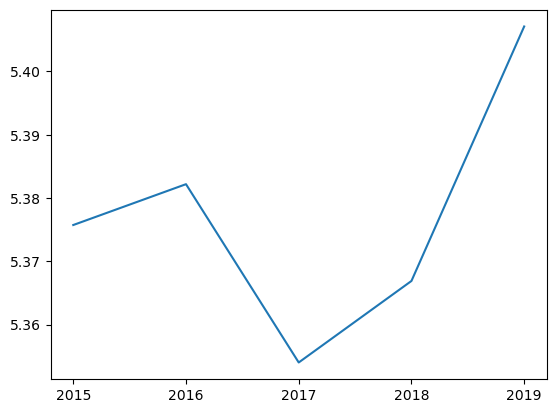

In [310]:
# Happiness Score Mean 2015-2019

x_axis = ['2015', '2016', '2017', '2018', '2019']
y_axis_hs_mean = [hs_stats_2015['mean'], hs_stats_2016['mean'], hs_stats_2017['mean'], hs_stats_2018['mean'], hs_stats_2019['mean']]

plt.plot(x_axis, y_axis_hs_mean, label='Happiness Score Evolution 2015-2019')

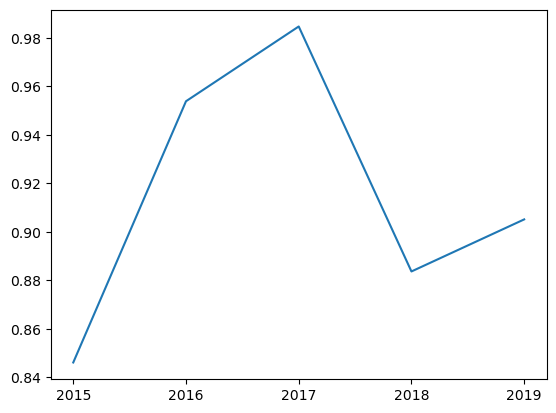

In [311]:
# Economy Score Mean 2015-2019

y_axis_ec_mean = [ec_stats_2015['mean'], ec_stats_2016['mean'], ec_stats_2017['mean'], ec_stats_2018['mean'], ec_stats_2019['mean']]

plt.plot(x_axis, y_axis_ec_mean, label='Economy Score Evolution 2015-2019')

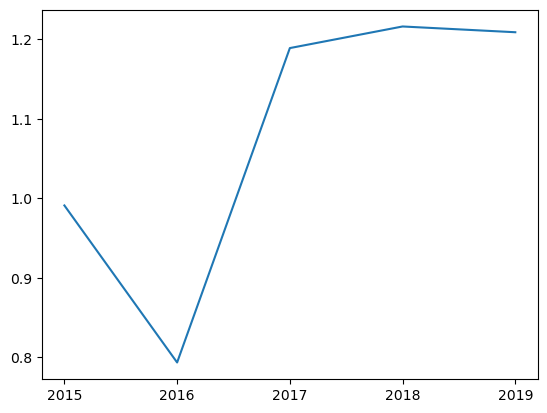

In [312]:
# Family Score Mean 2015-2019

y_axis_fa_mean = [fa_stats_2015['mean'], fa_stats_2016['mean'], fa_stats_2017['mean'], ss_stats_2018['mean'], fa_stats_2019['mean']]

plt.plot(x_axis, y_axis_fa_mean, label='Family Score Evolution 2015-2019')

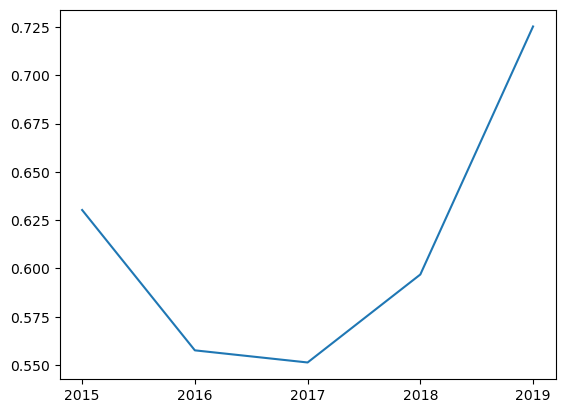

In [313]:
# Health Score Mean Evolution 2015-2019

y_axis_he_mean = [he_stats_2015['mean'], he_stats_2016['mean'], he_stats_2017['mean'], he_stats_2018['mean'], he_stats_2019['mean']]

plt.plot(x_axis, y_axis_he_mean, label='Health Score Evolution 2015-2019')

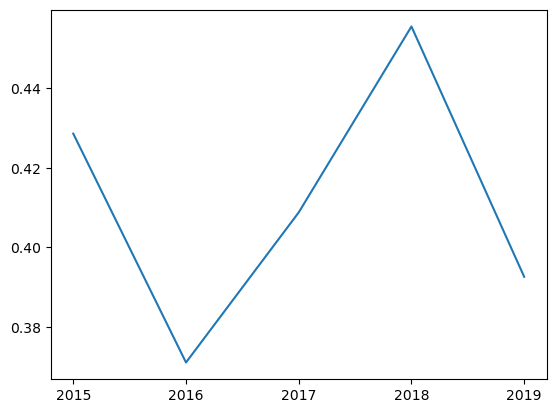

In [314]:
# Freedom Score Mean Evolution 2015-2019

y_axis_fr_mean = [fr_stats_2015['mean'], fr_stats_2016['mean'], fr_stats_2017['mean'], fr_stats_2018['mean'], fr_stats_2019['mean']]

plt.plot(x_axis, y_axis_fr_mean, label='Freedom Score Evolution 2015-2019')

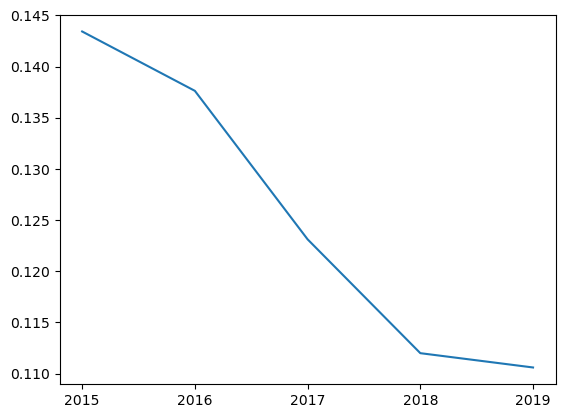

In [315]:
# Trust Score Mean Evolution 2015-2019

y_axis_tr_mean = [tr_stats_2015['mean'], tr_stats_2016['mean'], tr_stats_2017['mean'], tr_stats_2018['mean'], tr_stats_2019['mean']]

plt.plot(x_axis, y_axis_tr_mean, label='Trust Score Evolution 2015-2019')

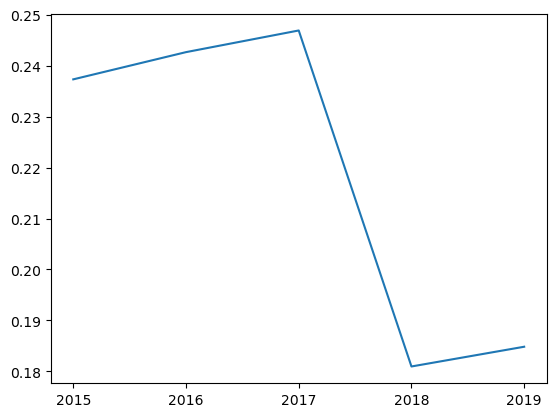

In [316]:
# Generosity Score Mean Evolution 2015-2019

y_axis_ge_mean = [ge_stats_2015['mean'], ge_stats_2016['mean'], ge_stats_2017['mean'], ge_stats_2018['mean'], ge_stats_2019['mean']]

plt.plot(x_axis, y_axis_ge_mean, label='Generosity Score Evolution 2015-2019')

### Task 4. Two histograms within the same figure that compare the differences and similarities of the Happiness Scores 2015 and 2019.

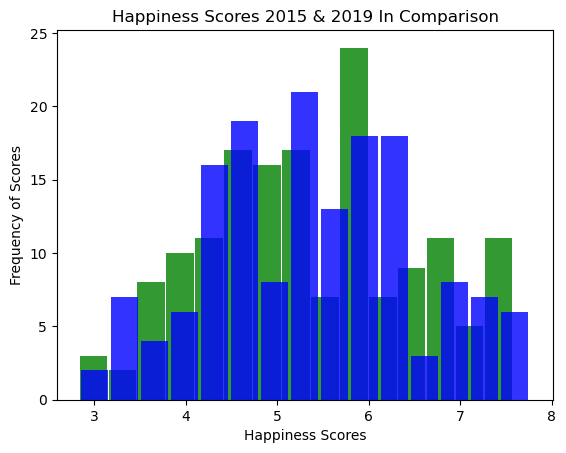

In [318]:
# I only need the happiness scores from 2015 and 2019. Therefore I need to extract them out of the datasets

happiness_score_2015 = whr_2015['Happiness Score']
happiness_score_2019 = whr_2019['Score']

plt.figure()

# Histogram for the Happiness Score 2015

plt.hist(happiness_score_2015, 15, width=0.3, color='green', alpha=0.8)

# Histogram for the Happiness Score 2019

plt.hist(happiness_score_2019, 15, width=0.3, color='blue', alpha=0.8)

# Labels 

plt.title('Happiness Scores 2015 & 2019 In Comparison')
plt.xlabel('Happiness Scores')
plt.ylabel('Frequency of Scores')

# Print the Figure

plt.show()

The happiness scores from 2015 and 2019 show a couple of interesting similarities and differences.

The happiness scores from 2015 are visible in green. The 2019 scores are blue. Both datasets show a peak in frequency around the 20-25 frequency mark. In addition to that, the peaks are in the same region, at a happiness score from 5 to 6. The same is true when we look at the area where the majority of countries scored, which is the range from 4 to 7. Both datasets have the same range of data, with a minimum score of 3 and a maximum score slightly below 8.

However, even if the peaks of both years are in the same region, they still peak at different values. Also, there are obvious differences in score frequencies. While in 2015, there were a lot of countries scoring around 5, there were only a few countries in 2019. The same case, although the other way around, is visible at the score of 6.5.

### Task 5. Calculation of the correlation coefficients between the Happiness_Index (Rank) and the continuous variables (economy, family, health, freedom, trust, generosity) to find out the variable with the highest positive correlation with happiness and the variable with the highest negative correlation with happiness.

In [321]:
# Correlation Coefficients 2015

# Initially, I started to use a loop with a normal list. To avoid an overload of too many values to be unpacked, I need to pair every column with a label in a separate tuple.

# The Happiness Index variable is here 'Happiness Rank'

columns2015 = [
    ('Economy (GDP per Capita)', 'Economy'),
    ('Family', 'Family'),
    ('Health (Life Expectancy)', 'Health'),
    ('Freedom', 'Freedom'),
    ('Trust (Government Corruption)', 'Trust'),
    ('Generosity', 'Generosity')
]

# Loop through each column and calculate the correlation
for col, label in columns2015:
    correlation2015 = whr_2015['Happiness Rank'].corr(whr_2015[col])
    print(f'The Correlation of the Happiness Rank and the {label} in 2015 is: {correlation2015}')

The Correlation of the Happiness Rank and the Economy in 2015 is: -0.7852669153290178
The Correlation of the Happiness Rank and the Family in 2015 is: -0.7336435317250534
The Correlation of the Happiness Rank and the Health in 2015 is: -0.7356129584428028
The Correlation of the Happiness Rank and the Freedom in 2015 is: -0.556886088374189
The Correlation of the Happiness Rank and the Trust in 2015 is: -0.37231511689406355
The Correlation of the Happiness Rank and the Generosity in 2015 is: -0.16014156750561198


When examining the results for 2015, it is important to note that a **lower** happiness rank indicates a **higher** happiness (e.g. Rank 1 has the highest happiness score). Hence, the lower the correlation coefficient, the higher the happiness (and the lower the happiness rank). The same counts for all other years. 

With this in mind, all variables are negatively correlated with the happiness rank. However, the economy has the highest negative correlation with the happiness rank, and the generosity the lowest negative. 

In [323]:
# Correlation Coefficients 2016

# The Happiness Index variable is here 'Happiness Rank'

columns2016 = [
    ('Economy (GDP per Capita)', 'Economy'),
    ('Family', 'Family'),
    ('Health (Life Expectancy)', 'Health'),
    ('Freedom', 'Freedom'),
    ('Trust (Government Corruption)', 'Trust'),
    ('Generosity', 'Generosity')
]

# Loop through each column and calculate the correlation
for col, label in columns2016:
    correlation2016 = whr_2016['Happiness Rank'].corr(whr_2016[col])
    print(f'The Correlation of the Happiness Rank and the {label} in 2016 is: {correlation2016}')

The Correlation of the Happiness Rank and the Economy in 2016 is: -0.7935771153666059
The Correlation of the Happiness Rank and the Family in 2016 is: -0.7332763455700572
The Correlation of the Happiness Rank and the Health in 2016 is: -0.7679907812050305
The Correlation of the Happiness Rank and the Freedom in 2016 is: -0.5571687096310288
The Correlation of the Happiness Rank and the Trust in 2016 is: -0.38710163973722495
The Correlation of the Happiness Rank and the Generosity in 2016 is: -0.14536878061141845


All correlation coefficients are negatively correlated with the happiness rank. However, the economy has the highest negative correlation with the happiness rank, and generosity the lowest. 

In [325]:
# Correlation Coefficients 2017

# The Happiness Index variable is here 'Happiness.Rank'

columns2017 = [
    ('Economy..GDP.per.Capita.', 'Economy'),
    ('Family', 'Family'),
    ('Health..Life.Expectancy.', 'Health'),
    ('Freedom', 'Freedom'),
    ('Trust..Government.Corruption.', 'Trust'),
    ('Generosity', 'Generosity')
]

# Loop through each column and calculate the correlation
for col, label in columns2017:
    correlation2017 = whr_2017['Happiness.Rank'].corr(whr_2017[col])
    print(f'The Correlation of the Happiness Rank and the {label} in 2017 is: {correlation2017}')

The Correlation of the Happiness Rank and the Economy in 2017 is: -0.8132436353491987
The Correlation of the Happiness Rank and the Family in 2017 is: -0.7367526832313124
The Correlation of the Happiness Rank and the Health in 2017 is: -0.7807158366857989
The Correlation of the Happiness Rank and the Freedom in 2017 is: -0.5516078425657575
The Correlation of the Happiness Rank and the Trust in 2017 is: -0.4058423300313604
The Correlation of the Happiness Rank and the Generosity in 2017 is: -0.13261979066642135


All correlation coefficients are negatively correlated with the happiness rank. However, the economy has the highest negative correlation with the happiness rank, and generosity the lowest. 

In [327]:
# Correlation Coefficients 2018

# ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# The Happiness Index variable is here 'Overall rank'

columns2018 = [
    ('GDP per capita', 'Economy'),
    ('Social support', 'Family'),
    ('Healthy life expectancy', 'Health'),
    ('Freedom to make life choices', 'Freedom'),
    ('Perceptions of corruption', 'Trust'),
    ('Generosity', 'Generosity')
]

# Loop through each column and calculate the correlation
for col, label in columns2018:
    correlation2018 = whr_2018['Overall rank'].corr(whr_2018[col])
    print(f'The Correlation of the Happiness Rank and the {label} in 2018 is: {correlation2018}')



The Correlation of the Happiness Rank and the Economy in 2018 is: -0.8095571678875881
The Correlation of the Happiness Rank and the Family in 2018 is: -0.7589426025854626
The Correlation of the Happiness Rank and the Health in 2018 is: -0.7807111557617847
The Correlation of the Happiness Rank and the Freedom in 2018 is: -0.544525832514948
The Correlation of the Happiness Rank and the Trust in 2018 is: -0.371133200419895
The Correlation of the Happiness Rank and the Generosity in 2018 is: -0.10374237762763855


All correlation coefficients are negatively correlated with the happiness rank. However, the economy has the highest negative correlation with the happiness rank, and generosity the lowest. 

In [329]:
# Correlation Coefficients 2019

#['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# The Happiness Index variable is here 'Overall rank'

columns2019 = [
    ('GDP per capita', 'Economy'),
    ('Social support', 'Family'),
    ('Healthy life expectancy', 'Health'),
    ('Freedom to make life choices', 'Freedom'),
    ('Perceptions of corruption', 'Trust'),
    ('Generosity', 'Generosity')
]

# Loop through each column and calculate the correlation
for col, label in columns2019:
    correlation2019 = whr_2019['Overall rank'].corr(whr_2019[col])
    print(f'The Correlation of the Happiness Rank and the {label} in 2019 is: {correlation2019}')


The Correlation of the Happiness Rank and the Economy in 2019 is: -0.8019465355862585
The Correlation of the Happiness Rank and the Family in 2019 is: -0.76746530877385
The Correlation of the Happiness Rank and the Health in 2019 is: -0.7874106573506171
The Correlation of the Happiness Rank and the Freedom in 2019 is: -0.5466063956173794
The Correlation of the Happiness Rank and the Trust in 2019 is: -0.3519585133871021
The Correlation of the Happiness Rank and the Generosity in 2019 is: -0.047992610911073576


All correlation coefficients are negatively correlated with the happiness rank. However, the economy has the highest negative correlation with the happiness rank, and generosity the lowest.

## Modelling

### Task 1. For each year in the dataset, create a unidimensional linear model where the independent variable is one of the factors (economy, family, health, freedom, trust, generosity), and the dependent variable is the happiness score. Report the coefficients and intercept for each linear model and calculate the coefficient of determination (R^2) for each model.

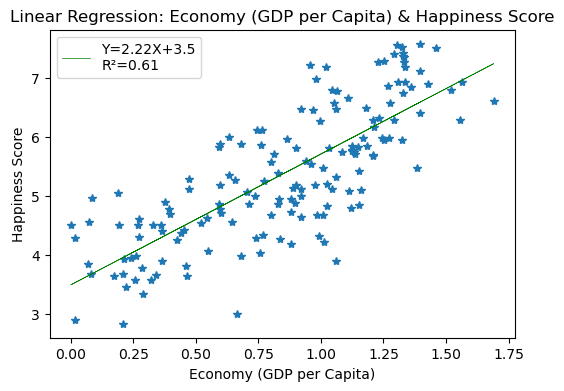

Variable: Economy (GDP per Capita)
Coefficient (Slope): 2.218227119309064
Intercept: 3.498809659824362
R^2: 0.6099071541531225


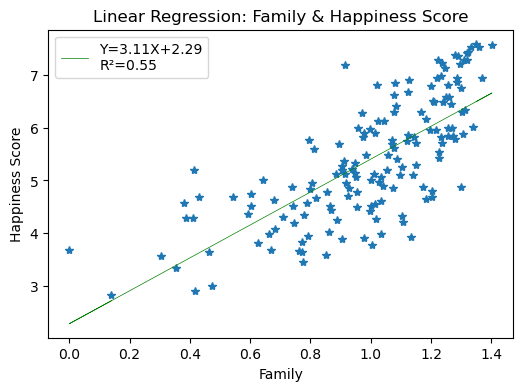

Variable: Family
Coefficient (Slope): 3.1134240279003205
Intercept: 2.2901879057024104
R^2: 0.5484960581741372


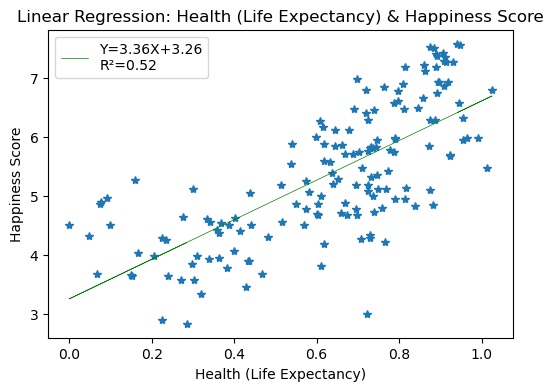

Variable: Health (Life Expectancy)
Coefficient (Slope): 3.3560926526645476
Intercept: 3.2605253460561046
R^2: 0.524465053550347


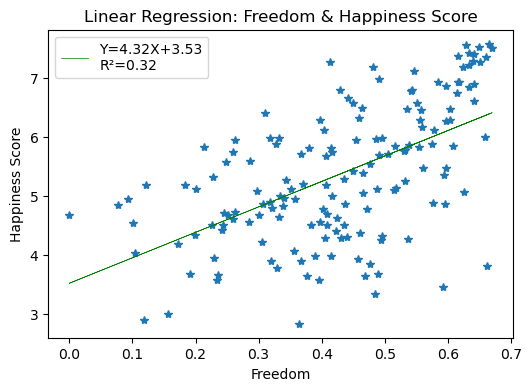

Variable: Freedom
Coefficient (Slope): 4.317441267524674
Intercept: 3.5252143615908773
R^2: 0.3228636316432787


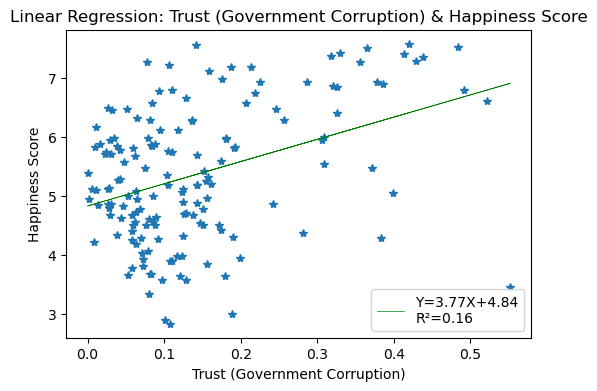

Variable: Trust (Government Corruption)
Coefficient (Slope): 3.769816105848417
Intercept: 4.835060232031683
R^2: 0.1561819206666999


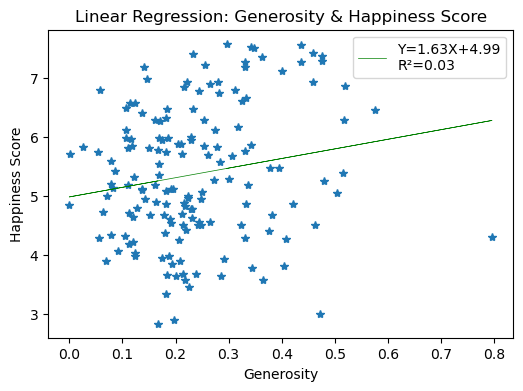

Variable: Generosity
Coefficient (Slope): 1.6297639666841481
Intercept: 4.988998511543929
R^2: 0.0325147710702397


In [333]:
# Installing the appropriate library to create linear models

from sklearn.linear_model import LinearRegression

# 2015 Variables - Happiness Score - Linear Regression

# Define the list of variables (independent variables)
variables_15 = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']

# Loop through each variable
for var in variables_15:
    X = whr_2015[var].values.reshape(-1, 1)
    Y = whr_2015['Happiness Score'].values
    mymodel = LinearRegression().fit(X, Y)    
    a = mymodel.coef_[0]
    b = mymodel.intercept_
    r_squared = mymodel.score(X, Y)
    Y_pred = mymodel.predict(X)
    # Plot
    plt.figure(figsize=(6, 4))
    plt.plot(X, Y, '*')
    plt.plot(X, Y_pred, '-g', linewidth=0.5, label=f'Y={round(a, 2)}X+{round(b, 2)}\nR²={round(r_squared, 2)}')
    plt.legend()
    plt.xlabel(var)
    plt.ylabel('Happiness Score')
    plt.title(f'Linear Regression: {var} & Happiness Score')
    plt.show()
    # Print results
    print(f'Variable: {var}')
    print(f'Coefficient (Slope): {a}')
    print(f'Intercept: {b}')
    print(f'R^2: {r_squared}')

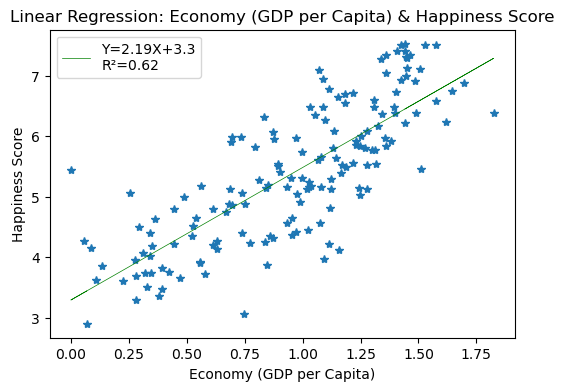

Variable: Economy (GDP per Capita)
Coefficient (Slope): 2.186863221725733
Intercept: 3.2961800413080065
R^2: 0.6246088901220189


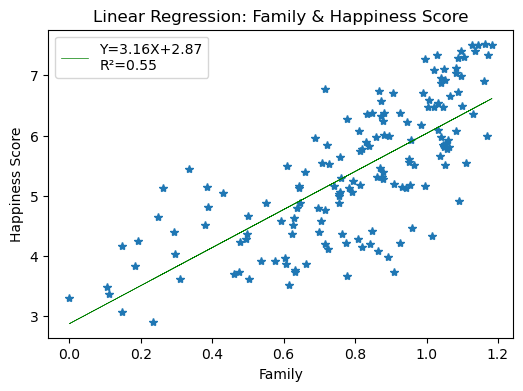

Variable: Family
Coefficient (Slope): 3.1644760594639627
Intercept: 2.8707897965612656
R^2: 0.5464928946987392


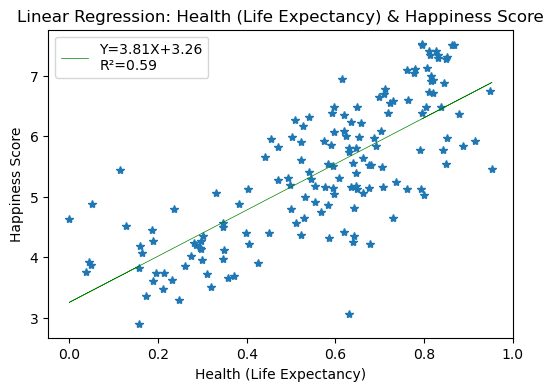

Variable: Health (Life Expectancy)
Coefficient (Slope): 3.8099939212365515
Intercept: 3.2576597858122227
R^2: 0.5858131793964683


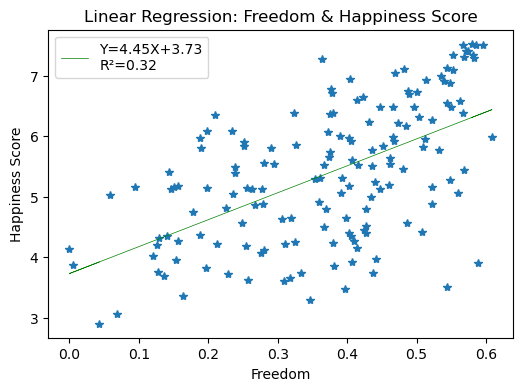

Variable: Freedom
Coefficient (Slope): 4.447428893666056
Intercept: 3.7322157882953566
R^2: 0.32129247733409216


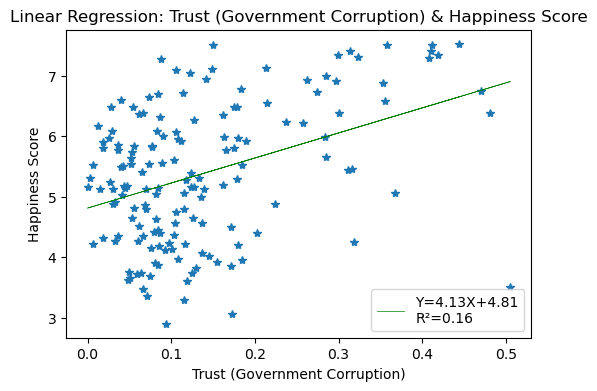

Variable: Trust (Government Corruption)
Coefficient (Slope): 4.133629386976768
Intercept: 4.81329910311879
R^2: 0.16162992613817273


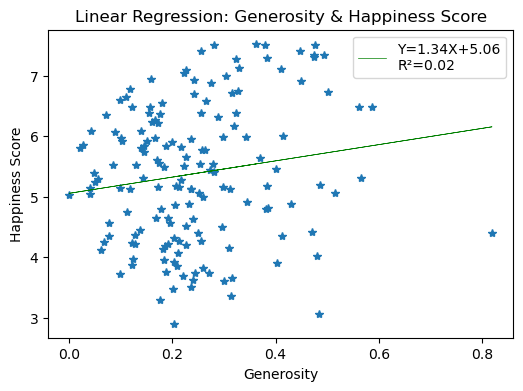

Variable: Generosity
Coefficient (Slope): 1.3387764939952198
Intercept: 5.057350806663847
R^2: 0.024601231236667687


In [334]:
# 2016 Variables - Happiness Score - Linear Regression

variables_16 = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']

# Loop through each variable
for var in variables_16:
    X = whr_2016[var].values.reshape(-1, 1)
    Y = whr_2016['Happiness Score'].values
    mymodel = LinearRegression().fit(X, Y)    
    a = mymodel.coef_[0]
    b = mymodel.intercept_
    r_squared = mymodel.score(X, Y)
    Y_pred = mymodel.predict(X)
    # Plot
    plt.figure(figsize=(6, 4))
    plt.plot(X, Y, '*')
    plt.plot(X, Y_pred, '-g', linewidth=0.5, label=f'Y={round(a, 2)}X+{round(b, 2)}\nR²={round(r_squared, 2)}')
    plt.legend()
    plt.xlabel(var)
    plt.ylabel('Happiness Score')
    plt.title(f'Linear Regression: {var} & Happiness Score')
    plt.show()
    # Print the results
    print(f'Variable: {var}')
    print(f'Coefficient (Slope): {a}')
    print(f'Intercept: {b}')
    print(f'R^2: {r_squared}')

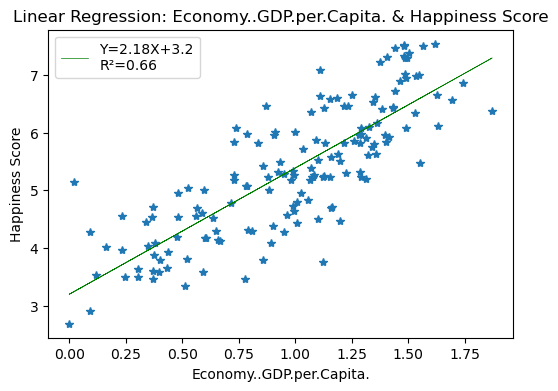

Variable: Economy..GDP.per.Capita.
Coefficient (Slope): 2.1841849463496814
Intercept: 3.203212682686188
R^2: 0.6601054760421123


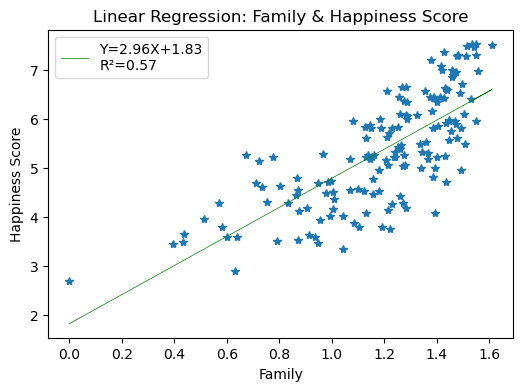

Variable: Family
Coefficient (Slope): 2.964247515232161
Intercept: 1.8298321531238795
R^2: 0.5666124984216684


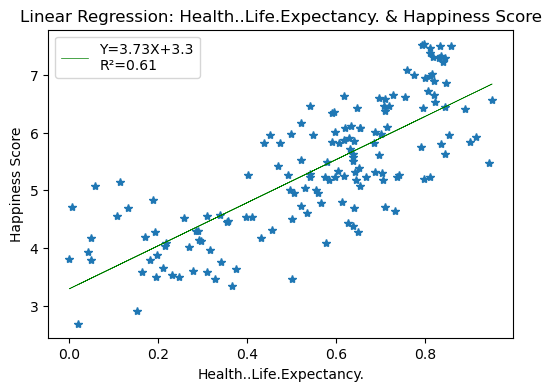

Variable: Health..Life.Expectancy.
Coefficient (Slope): 3.731201709128991
Intercept: 3.296855685378315
R^2: 0.6114467796235595


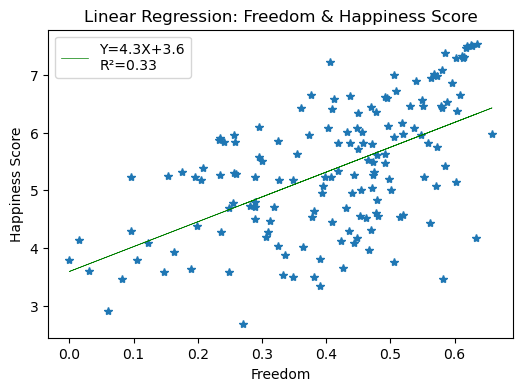

Variable: Freedom
Coefficient (Slope): 4.299786341855024
Intercept: 3.5963270129355083
R^2: 0.32505641952324205


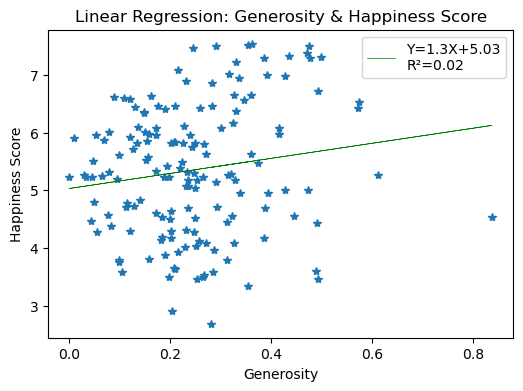

Variable: Generosity
Coefficient (Slope): 1.303083619420964
Intercept: 5.032309548004588
R^2: 0.024104375578602566


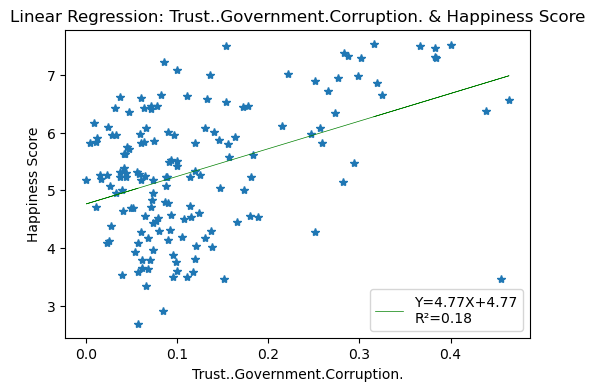

Variable: Trust..Government.Corruption.
Coefficient (Slope): 4.774591796345781
Intercept: 4.766170560287328
R^2: 0.18410942089464832


In [335]:
# 2017 Variables - Happiness Score - Linear Regression

variables_17 = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.']

# Loop through each variable
for var in variables_17:
    X = whr_2017[var].values.reshape(-1, 1)
    Y = whr_2017['Happiness.Score'].values
    mymodel = LinearRegression().fit(X, Y)    
    a = mymodel.coef_[0]
    b = mymodel.intercept_
    r_squared = mymodel.score(X, Y)
    Y_pred = mymodel.predict(X)
    # Plot
    plt.figure(figsize=(6, 4))
    plt.plot(X, Y, '*')
    plt.plot(X, Y_pred, '-g', linewidth=0.5, label=f'Y={round(a, 2)}X+{round(b, 2)}\nR²={round(r_squared, 2)}')
    plt.legend()
    plt.xlabel(var)
    plt.ylabel('Happiness Score')
    plt.title(f'Linear Regression: {var} & Happiness Score')
    plt.show()
    # Print the results 
    print(f'Variable: {var}')
    print(f'Coefficient (Slope): {a}')
    print(f'Intercept: {b}')
    print(f'R^2: {r_squared}')

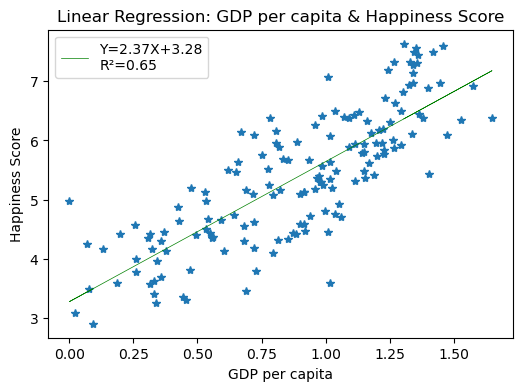

Variable: GDP per capita
Coefficient (Slope): 2.365109159333876
Intercept: 3.2769032157808957
R^2: 0.6500956458900138


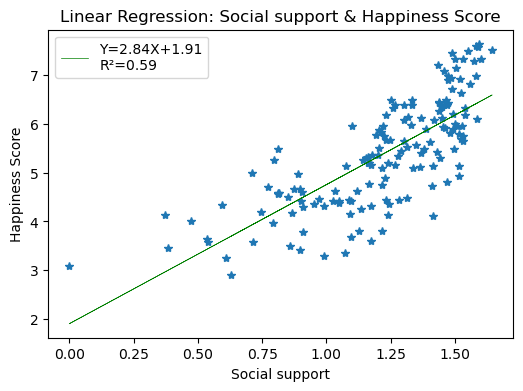

Variable: Social support
Coefficient (Slope): 2.8431286778559564
Intercept: 1.9094872170297332
R^2: 0.5876335776387964


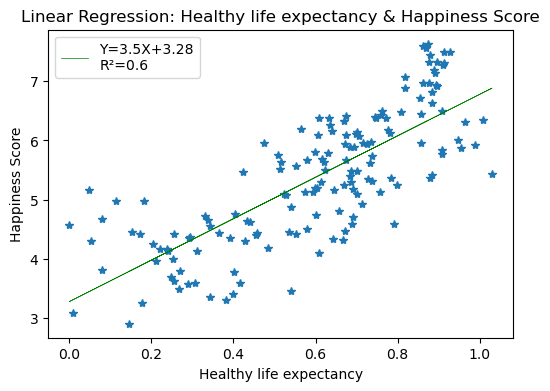

Variable: Healthy life expectancy
Coefficient (Slope): 3.49928341371956
Intercept: 3.2782535206214267
R^2: 0.6046580529855223


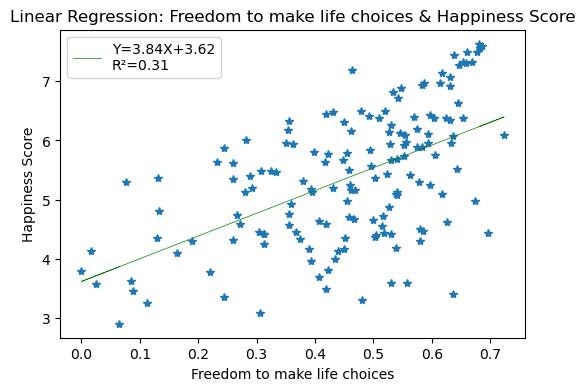

Variable: Freedom to make life choices
Coefficient (Slope): 3.8375689649230793
Intercept: 3.618475595265142
R^2: 0.3109305709074668


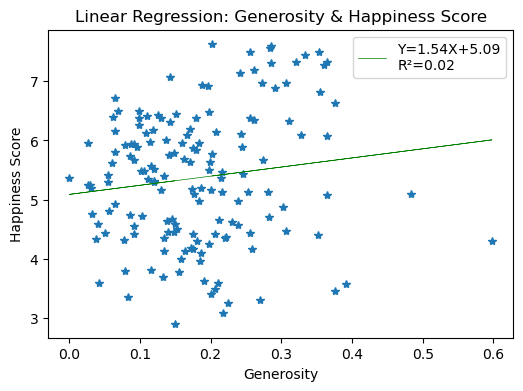

Variable: Generosity
Coefficient (Slope): 1.5395333808958984
Intercept: 5.088280962145091
R^2: 0.018524726743887943


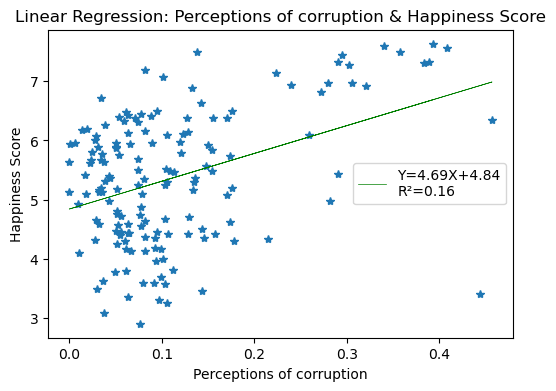

Variable: Perceptions of corruption
Coefficient (Slope): 4.6935220198599295
Intercept: 4.841222307969236
R^2: 0.1642612183847243


In [336]:
# 2018 Variables - Happiness Score - Linear Regression

variables_18 = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Loop through each variable
for var in variables_18:
    X = whr_2018[var].values.reshape(-1, 1)
    Y = whr_2018['Score'].values
    mymodel = LinearRegression().fit(X, Y)    
    a = mymodel.coef_[0]
    b = mymodel.intercept_
    r_squared = mymodel.score(X, Y)
    Y_pred = mymodel.predict(X)

    # Results
    plt.figure(figsize=(6, 4))
    plt.plot(X, Y, '*')
    plt.plot(X, Y_pred, '-g', linewidth=0.5, label=f'Y={round(a, 2)}X+{round(b, 2)}\nR²={round(r_squared, 2)}')
    plt.legend()
    plt.xlabel(var)
    plt.ylabel('Happiness Score')
    plt.title(f'Linear Regression: {var} & Happiness Score')
    plt.show()

    # Print the results for each variable
    print(f'Variable: {var}')
    print(f'Coefficient (Slope): {a}')
    print(f'Intercept: {b}')
    print(f'R^2: {r_squared}')

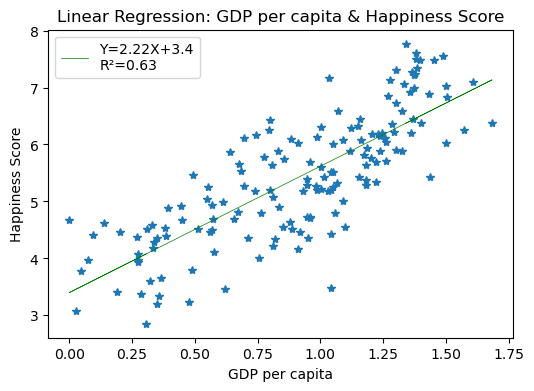

Variable: GDP per capita
Coefficient (Slope): 2.2181480010083567
Intercept: 3.399345178292417
R^2: 0.6302500079104005


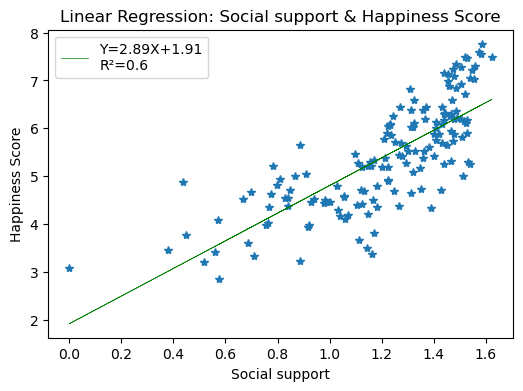

Variable: Social support
Coefficient (Slope): 2.8909870440102283
Intercept: 1.9124302447164827
R^2: 0.6038188059907055


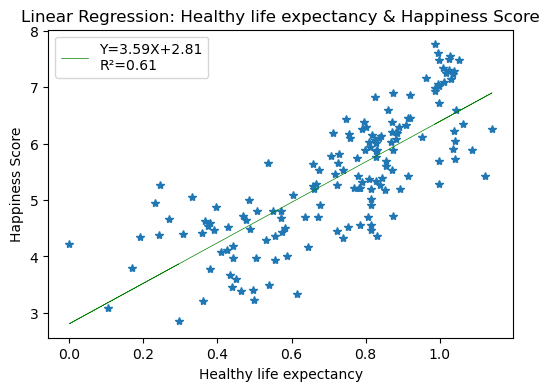

Variable: Healthy life expectancy
Coefficient (Slope): 3.5853671444308874
Intercept: 2.806831615470374
R^2: 0.608217726472529


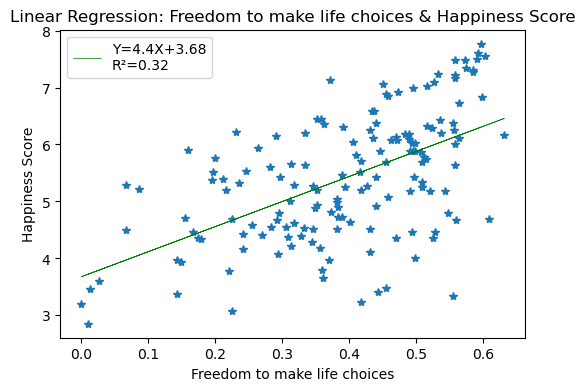

Variable: Freedom to make life choices
Coefficient (Slope): 4.402637427425646
Intercept: 3.678750521198885
R^2: 0.3211962970204276


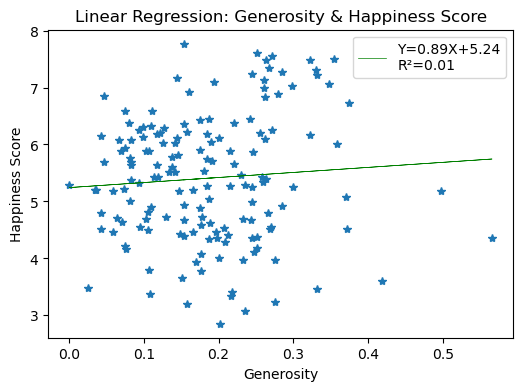

Variable: Generosity
Coefficient (Slope): 0.886056974056329
Intercept: 5.243311930103281
R^2: 0.00574923270887906


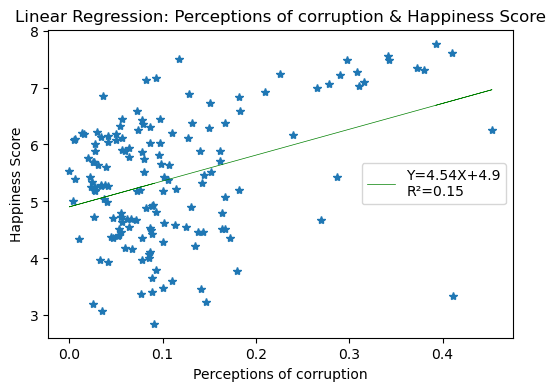

Variable: Perceptions of corruption
Coefficient (Slope): 4.540336355073412
Intercept: 4.904923311086945
R^2: 0.14869744042307598


In [337]:
# 2019 Economy - Happiness Score - Linear Regression

variables_19 = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Loop through each variable
for var in variables_19:
    X = whr_2019[var].values.reshape(-1, 1)
    Y = whr_2019['Score'].values
    mymodel = LinearRegression().fit(X, Y)    
    a = mymodel.coef_[0]
    b = mymodel.intercept_
    r_squared = mymodel.score(X, Y)
    Y_pred = mymodel.predict(X)
    # Plot
    plt.figure(figsize=(6, 4))
    plt.plot(X, Y, '*')
    plt.plot(X, Y_pred, '-g', linewidth=0.5, label=f'Y={round(a, 2)}X+{round(b, 2)}\nR²={round(r_squared, 2)}')
    plt.legend()
    plt.xlabel(var)
    plt.ylabel('Happiness Score')
    plt.title(f'Linear Regression: {var} & Happiness Score')
    plt.show()
    # Print the results 
    print(f'Variable: {var}')
    print(f'Coefficient (Slope): {a}')
    print(f'Intercept: {b}')
    print(f'R^2: {r_squared}')

## Modelling

### Task 2. Identify which variable explains the happiness score better by itself for each year. Is this variable the same every year, or does it vary?

To determine which variable explains the happiness score best, we have to look at the individual R^2 for each variable for each year, as the R^2 is the coefficient of the determination and therefore shows the the quality of fitness of the model. The highest possible R^2 is 1. Looking at the previous analysis, we can say that the Economy, or GDP per Capita, explained the happiness score for each year the best. However, Generosity was alwayst the worst explainatory.

### Task 3. Build a multidimensional linear model using all the variables (economy, family, health, freedom, trust, generosity) as independent variables and the happiness score as the dependent variable for each year. Then, compare the accuracy of the multidimensional model with the unidimensional models. Does the inclusion of all variables improve the accuracy of the model?

[0.8606572  1.40889159 0.97530903 1.33343293 0.78453814 0.38893285] 1.8601849449130579
0.7772384894312989


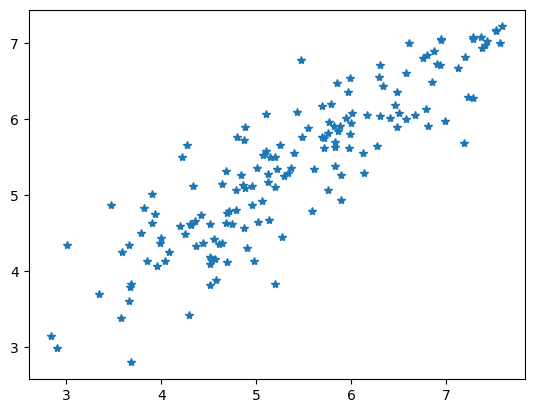

In [341]:
# 2015 economy, family, health, freedom, trust, generosity - Happiness Score - Linear Regression

X_2015_ml = whr_2015[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']].values
Y_2015_ml = whr_2015['Happiness Score'].values
X_2015_ml.shape

mymodel = LinearRegression().fit(X_2015_ml, Y_2015_ml)
coefficients= mymodel.coef_
intercept = mymodel.intercept_
print(coefficients, intercept)

Y_pred = mymodel.predict(X_2015_ml)
plt.plot(Y_2015_ml, Y_pred, '*')
print(mymodel.score(X_2015_ml, Y_2015_ml))

[0.72141276 1.22975433 1.43640277 1.51393491 0.91892704 0.15949414] 2.1902935948684616
0.7875118995858942


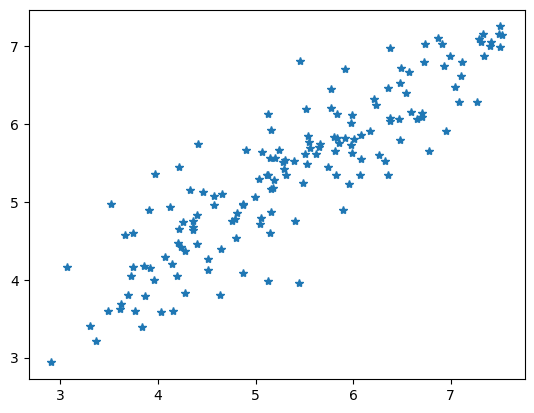

In [342]:
# 2016 economy, family, health, freedom, trust, generosity - Happiness Score - Linear Regression

X_2016_ml = whr_2016[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']].values
Y_2016_ml = whr_2016['Happiness Score'].values
X_2016_ml.shape

mymodel = LinearRegression().fit(X_2016_ml, Y_2016_ml)
coefficients= mymodel.coef_
intercept = mymodel.intercept_
print(coefficients, intercept)

Y_pred = mymodel.predict(X_2016_ml)
plt.plot(Y_2016_ml, Y_pred, '*')
print(mymodel.score(X_2016_ml, Y_2016_ml))

[0.78443345 1.1177711  1.28888029 1.47571525 0.82660722 0.38071813] 1.7430288791776647
0.8124246444063834


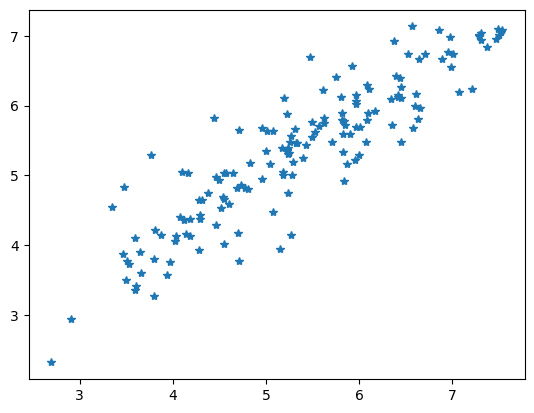

In [343]:
# 2017 economy, family, health, freedom, trust, generosity - Happiness Score - Linear Regression

X_2017_ml = whr_2017[['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.', 'Generosity']].values
Y_2017_ml = whr_2017['Happiness.Score'].values
X_2017_ml.shape

mymodel = LinearRegression().fit(X_2017_ml, Y_2017_ml)
coefficients= mymodel.coef_
intercept = mymodel.intercept_
print(coefficients, intercept)

Y_pred = mymodel.predict(X_2017_ml)
plt.plot(Y_2017_ml, Y_pred, '*')
print(mymodel.score(X_2017_ml, Y_2017_ml))

[0.90174591 1.11502192 0.96712182 1.39844188 0.72778882 0.52356684] 1.8234561292073477
0.7905110452481852


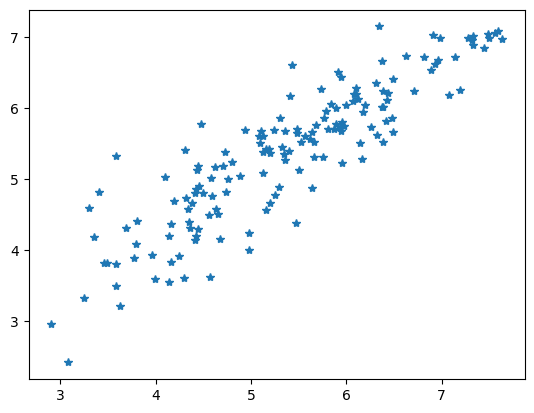

In [344]:
# 2018 economy, family, health, freedom, trust, generosity - Happiness Score - Linear Regression

# 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'

X_2018_ml = whr_2018[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']].values
Y_2018_ml = whr_2018['Score'].values
X_2018_ml.shape

mymodel = LinearRegression().fit(X_2018_ml, Y_2018_ml)
coefficients= mymodel.coef_
intercept = mymodel.intercept_
print(coefficients, intercept)

Y_pred = mymodel.predict(X_2018_ml)
plt.plot(Y_2018_ml, Y_pred, '*')
print(mymodel.score(X_2018_ml, Y_2018_ml))


[0.77537163 1.12419158 1.07814273 1.45483237 0.97228022 0.48978335] 1.7952202293072834
0.7791638079594221


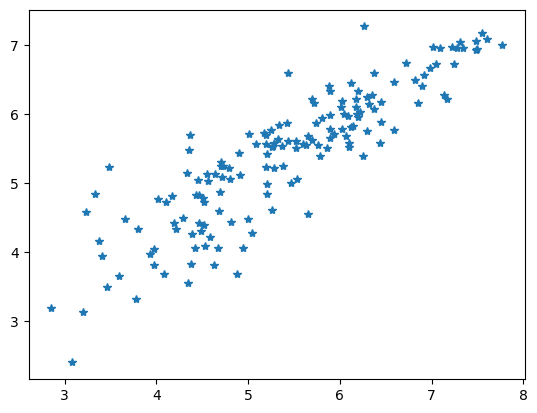

In [345]:
# 2019 economy, family, health, freedom, trust, generosity - Happiness Score - Linear Regression

X_2019_ml = whr_2019[['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']].values
Y_2019_ml = whr_2019['Score'].values
X_2019_ml.shape

mymodel = LinearRegression().fit(X_2019_ml, Y_2019_ml)
coefficients= mymodel.coef_
intercept = mymodel.intercept_
print(coefficients, intercept)

Y_pred = mymodel.predict(X_2019_ml)
plt.plot(Y_2019_ml, Y_pred, '*')
print(mymodel.score(X_2019_ml, Y_2019_ml))

The inclusion of all variables into the models definitely improves the accuracy of the model, as the R^2 is in every single year higher than what it is of models with only one respective variable. The R^2 is even higher with all variables than with only economy as a variable, which has the strongest R^2 out of all of other variables when it comes to the happiness score in univariative models.

## Inference and Hypothesis Testing

### Task 1. Consider the population to consist of all the countries listed. For the 2019 data, randomly select a sample of 30 countries from the population. Compute a 95% confidence interval for the sample mean of The Happiness score.

In [349]:
# Import the necessary library to randomly select samples & create confidence intervals
from scipy import stats

# Set seed for reproducability and sample 30 countries
np.random.seed(42) 

sample_size = 30
happiness_scores_sample = whr_2019['Score'].sample(n=sample_size, random_state=42)

# Calculate the mean, the standard deviation, and the standard error
sample_mean = np.mean(happiness_scores_sample)

sample_std = np.std(happiness_scores_sample, ddof=1) 

standard_error = sample_std / np.sqrt(sample_size)

# Calculate the 95% CI

confidence_level = 0.95
ci_lower, ci_upper = stats.norm.interval(confidence_level, loc=sample_mean, scale=standard_error) 

print(f"Sample Mean: {sample_mean}")
print(f"95% Confidence Interval: ({ci_lower}, {ci_upper})")

Sample Mean: 5.4996
95% Confidence Interval: (5.1420181226895725, 5.857181877310428)


**Inference and  Hypothesis Testing. When constructing the dataset, various variables were considered, including the
annual sunshine duration in hours for each country. Although the data was not
ultimately included, we know that the standard deviation of the values was 200 hours.
The newspaper claimed that the population average was 2500 hours or less. To
investigate this claim, a new measurement was conducted last year on a small sample of
50 countries randomly selected, and the sample average was found to be 2580 hours.
Formulate the null and alternative hypotheses to test the claim and determine whether
this should be a one-sided or two-sided test. Based on the sampled data, state whether
the null hypothesis should be rejected or not.**

Null Hypothesis: The null hypothesis is the original statement. In this case, the null hypothesis is that the population average was equal to 2500h of sunshine or less.

Alternative Hypothesis: The alternative hypothesis is in this case that the population mean of the sunshine duration was longer than 2500h. It is important to emphasize that even exactly 2500h, would still speak for the null hypothesis. To accept the alternative hypothesis, it has to be more than 2500h.

One-/ or Two-Sided Test: There should be a one-sided test. In this case, this is determined by the null hypothesis. Because we only want to find out if the average sunshine duration was longer than 2500, we're only looking at one side of the graph. Hence, only a one-sided test is needed. If the null hypothesis would be that the population average of sunshine duration is equal to 2500h, we would do a two-sided test.

In [352]:
# Calculation of the Z-Value to determine if we reject or accept the null hypothesis

sample_mean = 2580         
population_mean = 2500     
population_std = 200      
sample_size = 50           

# Significance level (alpha)
alpha = 0.05

# Standard Deviation of the Mean
standard_error = population_std / np.sqrt(sample_size)

# Z-Value
z_value = (sample_mean - population_mean) / standard_error

# Critical Z-Value (only 1 as we have a one-sided test)
z_critical = stats.norm.ppf(1 - alpha)

# Decision
if z_value > z_critical:
    decision = "NH rejected"
else:
    decision = "NH not rejected"

print(f"Z-value: {z_value:.2f}")
print(f"Critical Z-value: {z_critical:.2f}")
print(f"Decision: {decision}")

Z-value: 2.83
Critical Z-value: 1.64
Decision: NH rejected


Conclusion: The null hypothesis can be rejected as the Z-Value is greater than the critical Z-Value. Therefore, the claim of the newspaper is false.

# Part B - The Forecast of Air Passengers

### Task 1. Load the dataset and plot the time series. Which decomposition method do you think will be more appropriate for this dataset? Additive or multiplicative? Reason your answer.

In [355]:
# First step is that I need to import the needed and missing library

from statsmodels.tsa.seasonal import seasonal_decompose

In [356]:
data_airpassengers = pd.read_csv('AirPassengers.csv')

data_airpassengers.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [357]:
# Next, I need to change the format, change it to a datetime format, and set it as the index

data_airpassengers['Month'] = pd.to_datetime(data_airpassengers['Month'])
data_airpassengers.set_index('Month', inplace=True)

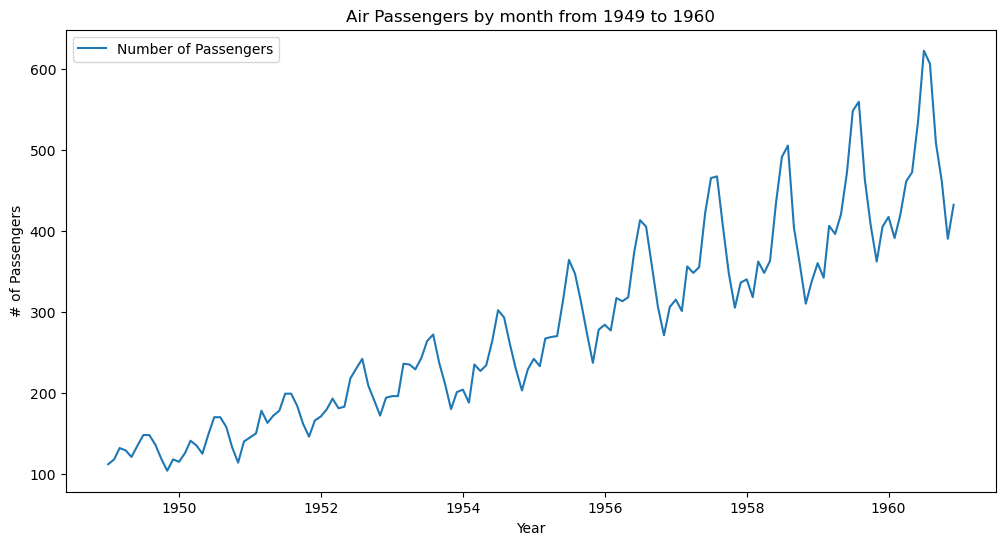

In [358]:
# Now I can plot the time series

plt.figure(figsize=(12, 6))
plt.plot(data_airpassengers, label='Number of Passengers')
# Labels
plt.title('Air Passengers by month from 1949 to 1960')
plt.xlabel('Year')
plt.ylabel('# of Passengers')
plt.legend()
plt.show()

Examining the evolution of Air Passengers from 1949 to 1960, one can say that a multiplicative decomposition model would be more appropriate for this dataset. The reason is that the graph shows an obvious upward trend, even though there are multiple fluctuations in it that seem to be proportionate to the respective time series. Hence, a multiplicative decompositional model would allow us to have a higher accuracy in analyzing the dataset in contrast to other models.

### Task 2. Perform a seasonal decomposition of the "Air Passengers" dataset using the method that you selected as more appropriate in your previous answer. Visualize the trend, seasonality, and residual components. make a plot(or several plots) to show all different components of the time series.

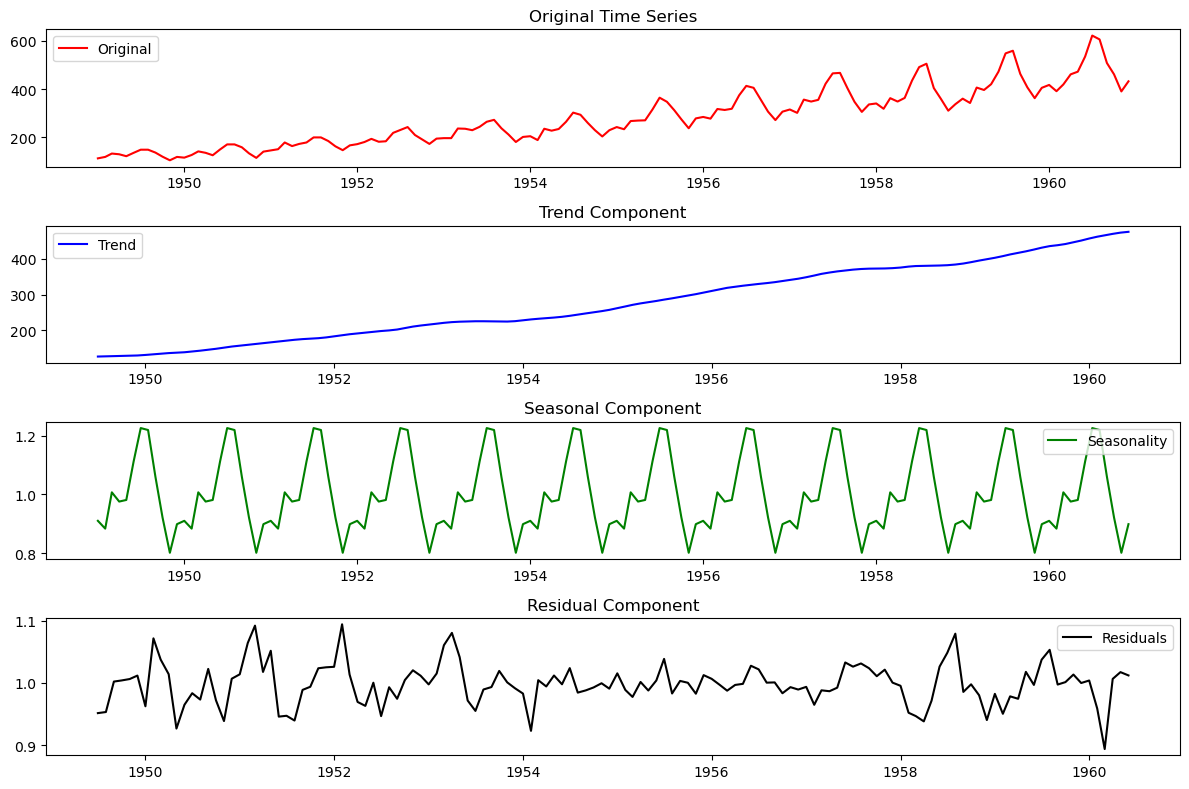

In [361]:
# Create the multiplicative model
decomposition = seasonal_decompose(data_airpassengers['#Passengers'], model='multiplicative')

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data_airpassengers['#Passengers'], label='Original', color='red')
plt.legend(loc='best')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='black')
plt.legend(loc='best')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

### Task 3. Can you estimate a prediction for the number of passengers in December 1961?

I need to use an ARIMA model, that allows me to come with a moving average model to a solution. 

Initial p-value: 0.9918802434376409


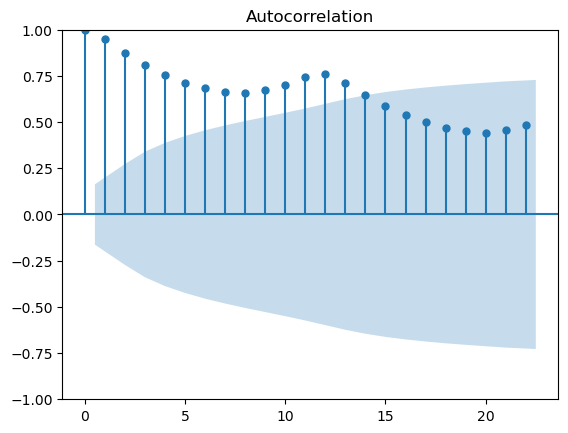

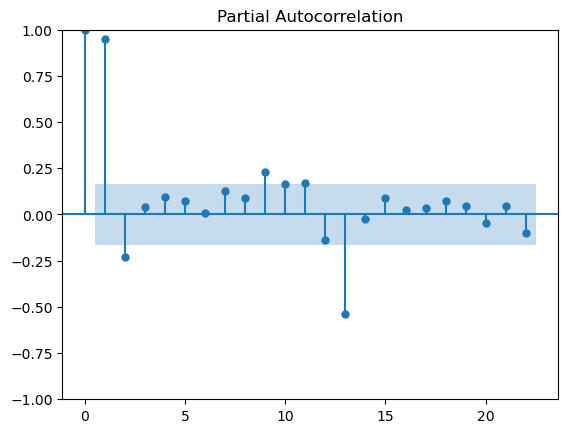

In [364]:
from pandas import to_datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

acf_original = plot_acf(data_airpassengers['#Passengers'])
pacf_original = plot_pacf(data_airpassengers['#Passengers'])

#Perform ACF test to check stationarity (mean, variance, autocovariance need to remain constant over time)
adf_test = adfuller(data_airpassengers['#Passengers'])
print('Initial ' f'p-value: {adf_test[1]}')


After differencing p-value: 0.05421329028382552


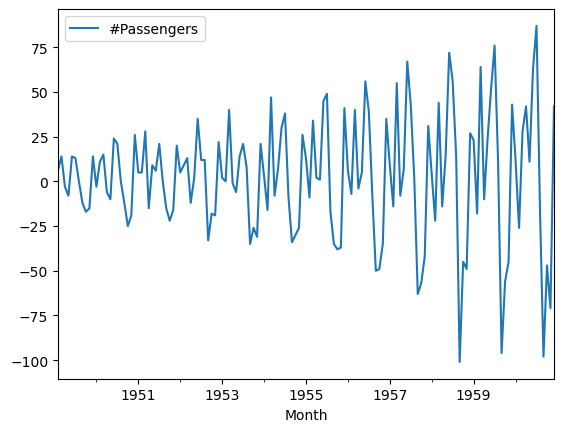

In [365]:
#The p-value is high with 0.99, so I need to make the series stationary
data_diff = data_airpassengers.diff().dropna()
data_diff.plot()

#Testing if the series is now stationary
adf_test = adfuller(data_diff['#Passengers'])
print('After differencing 'f'p-value: {adf_test[1]}')

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# of Passengers predicted in Dec. 1961: 450


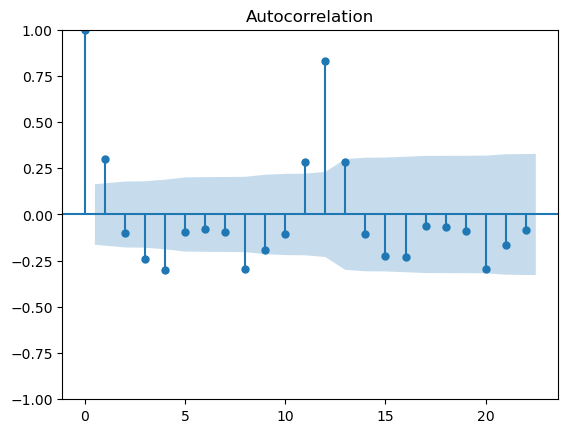

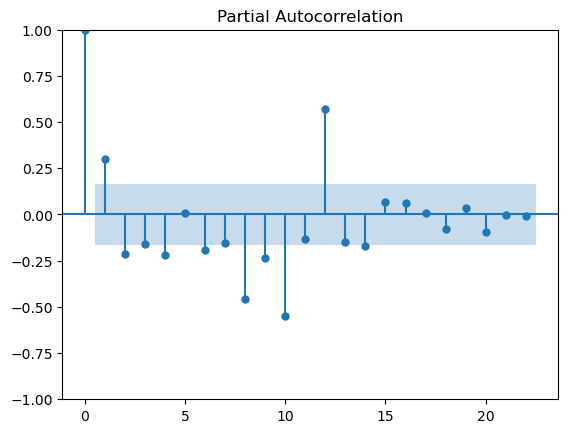

In [366]:
#I now plot ACF & PACF for the differenced data to choose p 
acf_diff = plot_acf(data_diff)
pacf_diff = plot_pacf(data_diff)

#Execution of the ARIMA model based on the differencing step,ACF test, and PAC - p=2 (autoregressive part), d=1 (differencing degree), q=2 (moving average component)
model = ARIMA(data_airpassengers['#Passengers'], order=(2,1,2))
model_fit = model.fit()

#Forecast 12 months ahead for December 1961 (in comparison to our last available date in the dataset)
forecast = model_fit.forecast(steps=12)

#Extract prediction for December 1961
december_1961_predicted = forecast.iloc[-1]
print(f"# of Passengers predicted in Dec. 1961: {december_1961_predicted:.0f}")